In [1]:
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
original_dataset_dir = 'C:/Users/HP/Desktop/Internship/Post-hurricane'

In [3]:
train_damage_dir = original_dataset_dir + '/train/damage'
validation_damage_dir = original_dataset_dir + '/validation/damage'
test_damage_dir = original_dataset_dir + '/test/damage'

train_nodamage_dir = original_dataset_dir + '/train/no_damage'
validation_nodamage_dir = original_dataset_dir + '/validation/no_damage'
test_nodamage_dir = original_dataset_dir + '/test/no_damage'

In [4]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total test damage images: ',len(os.listdir(test_damage_dir)))

print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))

total training damage images:  5000
total validation damage images:  1000
total test damage images:  1000
total training no damage images:  5000
total validation no damage images:  1000
total test no damage images:  1000


In [16]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [18]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

In [19]:
#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/train', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/validation',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/50
100/100 [==============================] - 6s 55ms/step - loss: 0.6257 - acc: 0.6495 - val_loss: 0.6280 - val_acc: 0.6240
Epoch 2/50
100/100 [==============================] - 5s 50ms/step - loss: 0.5274 - acc: 0.7625 - val_loss: 0.4672 - val_acc: 0.8090
Epoch 3/50
100/100 [==============================] - 5s 50ms/step - loss: 0.4695 - acc: 0.8090 - val_loss: 0.4122 - val_acc: 0.8440
Epoch 4/50
100/100 [==============================] - 5s 50ms/step - loss: 0.4332 - acc: 0.8210 - val_loss: 0.3770 - val_acc: 0.8470
Epoch 5/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3763 - acc: 0.8520 - val_loss: 0.3494 - val_acc: 0.8730
Epoch 6/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3584 - acc: 0.8540 - val_loss: 0.3298 - val_acc: 0.8630
Epoch 7/50
100/100 [==============================] - 5s 50ms/step - loss: 0.3157 - acc: 0.8795 - val_loss: 0.3930 - val_acc: 0.8430
Epoch 8/50
100/100 [==============================] - 5s 50ms/step - 

In [10]:
#it is generally a good practice to save the model after training
model.save('model_1.h5')

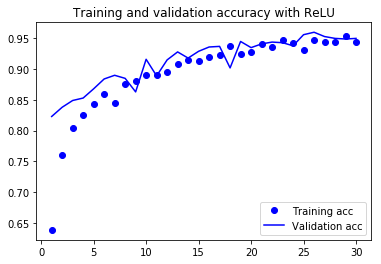

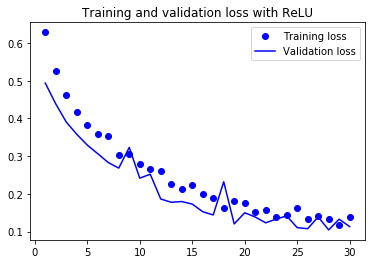

In [13]:
#plot loss and accuracy for detection overfitting (30 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

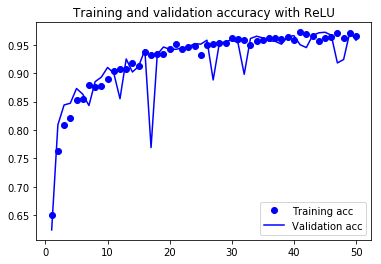

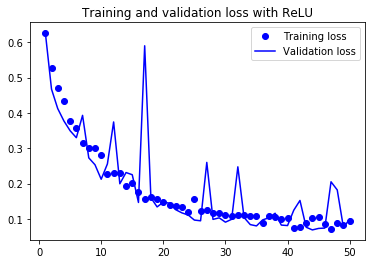

In [22]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [23]:
#the accuracy stalls at about 95.5% and we start seeing overfitting
#we perform data augmentation
#to fight overfitting, we add a Dropout layer right before 
#the densely connected layer
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.RMSprop(lr = 1e-4),
                 metrics = ['acc'])

In [24]:
#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6456 - acc: 0.6291 - val_loss: 0.5301 - val_acc: 0.7913
Epoch 2/100
100/100 [==============================] - 18s 184ms/step - loss: 0.5286 - acc: 0.7644 - val_loss: 0.5319 - val_acc: 0.7750
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.5086 - acc: 0.7703 - val_loss: 0.4313 - val_acc: 0.8356
Epoch 4/100
100/100 [==============================] - 18s 184ms/step - loss: 0.4823 - acc: 0.7884 - val_loss: 0.4510 - val_acc: 0.8150
Epoch 5/100
100/100 [==============================] - 19s 186ms/step - loss: 0.4326 - acc: 0.8169 - val_loss: 0.4088 - val_acc: 0.8375
Epoch 6/100
100/100 [==============================] - 19s 191ms/step - loss: 0.3935 - acc: 0.8378 - val_loss: 0.3212 - val_acc: 0.8731
Epoch 7/100
100/100 [==============================] - 18s 183ms/step - loss: 0.3659 - acc: 0.8534 

In [25]:
#it is generally a good practice to save the model after training
model.save('model_2_100epochs.h5')

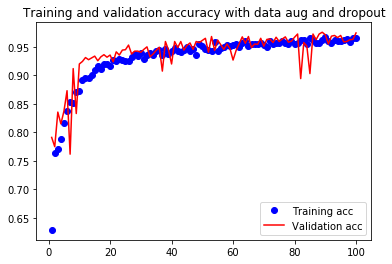

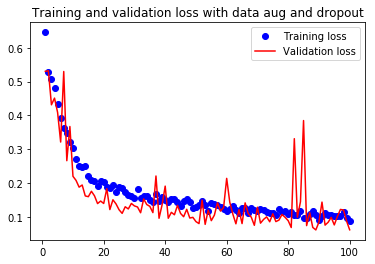

In [27]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout')
plt.legend()

plt.show()

In [ ]:
#validation accuracy can go up to 97.44%

In [34]:
#try again with Adam optimizer
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.Adam(),
                 metrics = ['acc'])

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 207ms/step - loss: 0.5735 - acc: 0.7016 - val_loss: 0.4079 - val_acc: 0.8612
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.4315 - acc: 0.8169 - val_loss: 0.3839 - val_acc: 0.8256
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.3181 - acc: 0.8744 - val_loss: 0.1985 - val_acc: 0.9250
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.2744 - acc: 0.8981 - val_loss: 0.1946 - val_acc: 0.9163
Epoch 5/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2339 - acc: 0.9100 - val_loss: 0.1786 - val_acc: 0.9300
Epoch 6/100
100/100 [==============================] - 19s 188ms/step - loss: 0.2701 - acc: 0.8941 - val_loss: 0.2241 - val_acc: 0.9131
Epoch 7/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2181 - acc: 0.9103 

In [35]:
model.save('model_2_100epochs_Adam.h5')

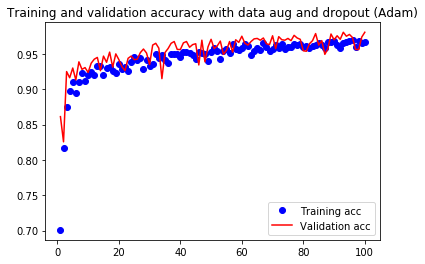

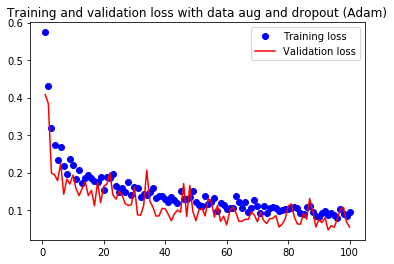

In [36]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()

In [29]:
#to visualize the intermediate activation
from keras.models import load_model

In [67]:
img_path = 'C:\Users\HP\Desktop\Internship\Post-hurricane/damage/-96.960704_28.783292.jpeg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


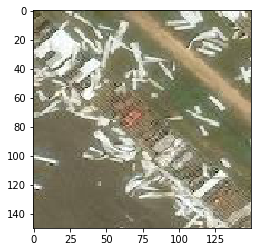

In [68]:
plt.imshow(img_tensor[0])
plt.show()

In [72]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

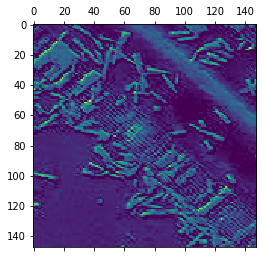

In [73]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4],cmap = 'viridis')

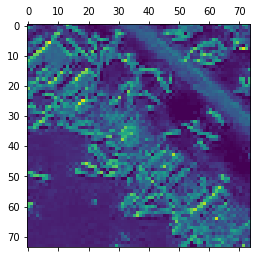

In [52]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0,:,:,4],cmap = 'viridis')

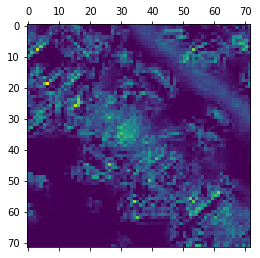

In [53]:
third_layer_activation = activations[2]
plt.matshow(third_layer_activation[0,:,:,4],cmap = 'viridis')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


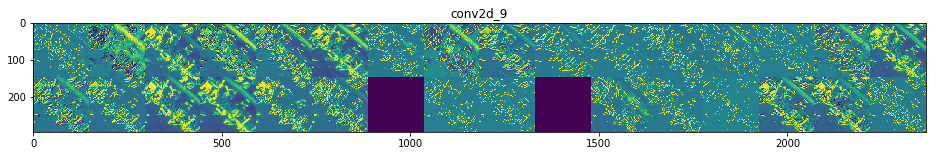

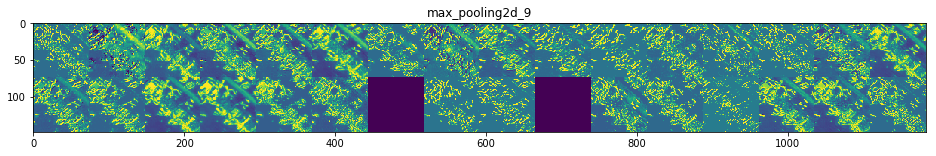

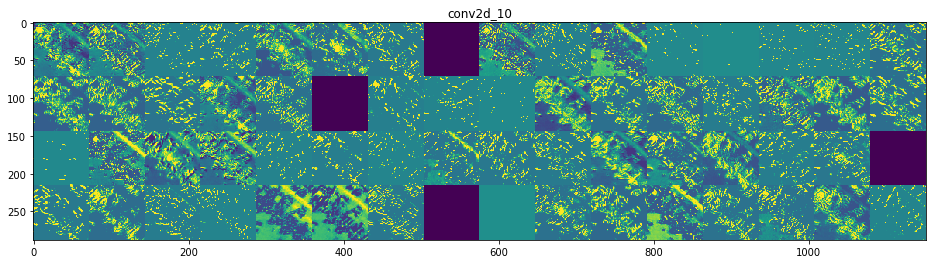

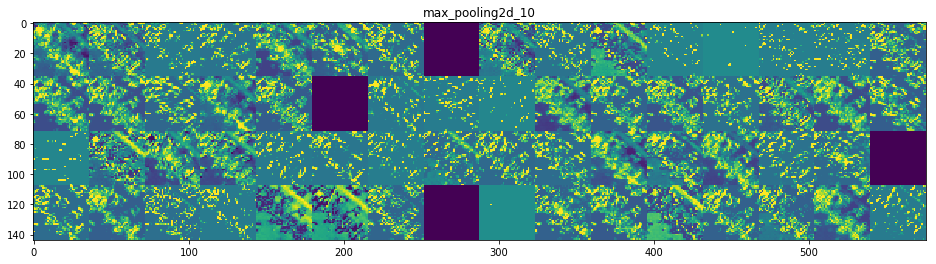

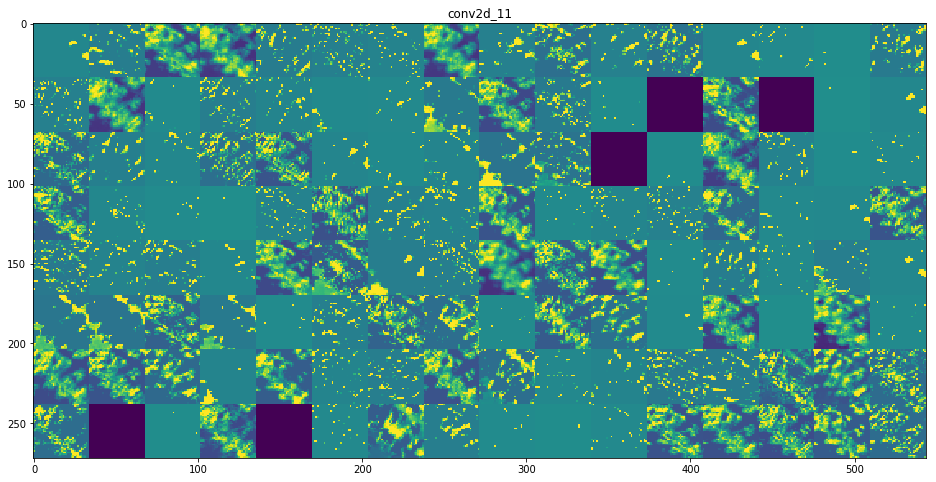

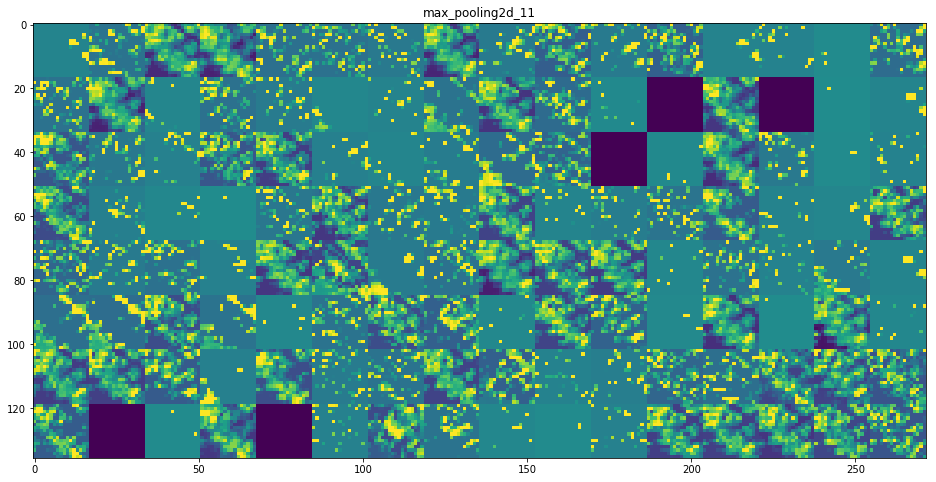

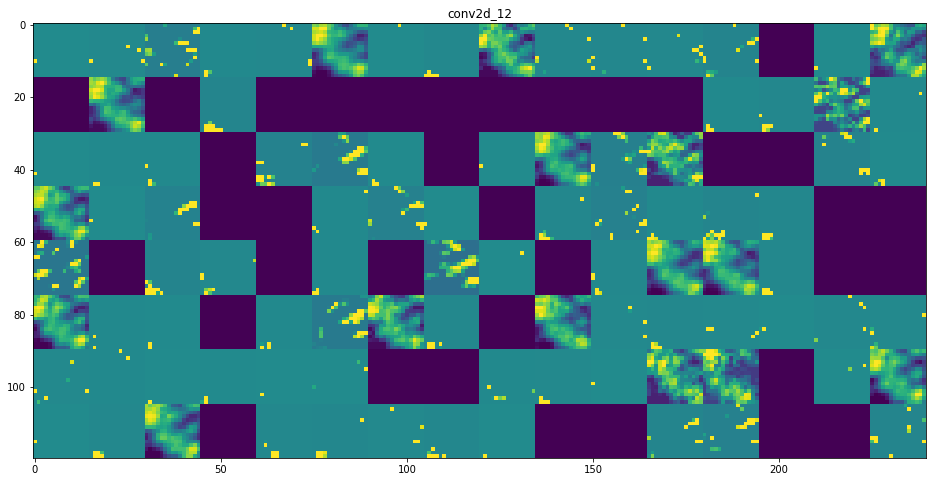

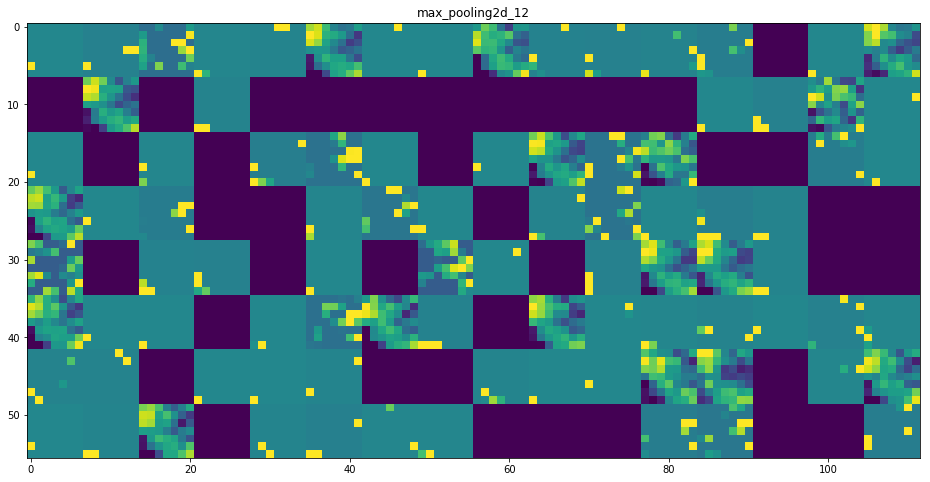

In [55]:
layer_names =[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [58]:
#let's build a model with leaky ReLU
from keras.layers import LeakyReLU
from keras.regularizers import l2
model_l = models.Sequential()
model_l.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(64,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Flatten())
model_l.add(layers.Dense(512,W_regularizer = l2(1e-6)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.Dense(1, activation = 'sigmoid'))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_regularizer=<keras.reg...)`


In [59]:
model_l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
__________

In [62]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model_l.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

#fit the model from image generator
history = model_l.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)



Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 7s 73ms/step - loss: 0.6177 - acc: 0.6800 - val_loss: 0.6220 - val_acc: 0.6400
Epoch 2/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5227 - acc: 0.7690 - val_loss: 0.4307 - val_acc: 0.8370
Epoch 3/30
100/100 [==============================] - 7s 65ms/step - loss: 0.4796 - acc: 0.7815 - val_loss: 0.4450 - val_acc: 0.7990
Epoch 4/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4101 - acc: 0.8250 - val_loss: 0.3498 - val_acc: 0.8580
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 0.3838 - acc: 0.8265 - val_loss: 0.3680 - val_acc: 0.8390
Epoch 6/30
100/100 [==============================] - 7s 65ms/step - loss: 0.3661 - acc: 0.8450 - val_loss: 0.2951 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.3228 - acc: 0.8685 - val_loss: 0.3045 - 

In [64]:
#it is generally a good practice to save the model after training
model_l.save('tomnod_leaky_30epochs.h5')

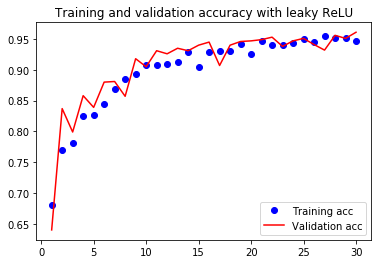

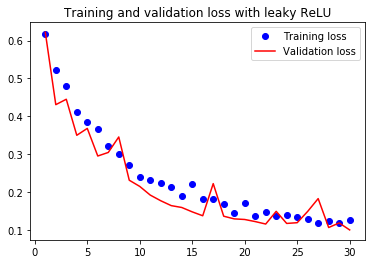

In [75]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with leaky ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with leaky ReLU')
plt.legend()

plt.show()

In [126]:
#temp
#let's build a model with leaky ReLU, Full dropout, L2 regularization, Data aug
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,W_regularizer = l2(1e-6)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)



/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_regularizer=<keras.reg...)`


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6969 - acc: 0.5216 - val_loss: 0.6911 - val_acc: 0.5319
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6725 - acc: 0.5706 - val_loss: 0.6901 - val_acc: 0.5275
Epoch 3/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6147 - acc: 0.6681 - val_loss: 0.7324 - val_acc: 0.5275
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 0.5874 - acc: 0.7109 - val_loss: 0.7887 - val_acc: 0.5319
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.5426 - acc: 0.7403 - val_loss: 0.7716 - val_acc: 0.5463
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.5391 - acc: 0.7537 - val_loss: 0.8964 - val_acc: 0.5331
Epoch 7/100
100/100 [==============================] - 19s 187ms/step - loss: 0.5380 - acc: 0.7650 

In [127]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('Final_maybe.h5')

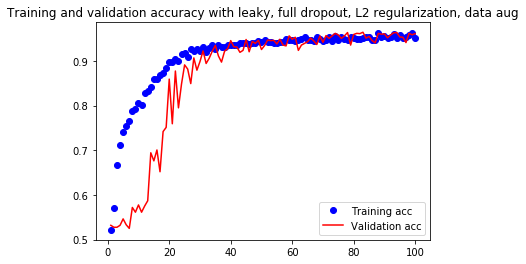

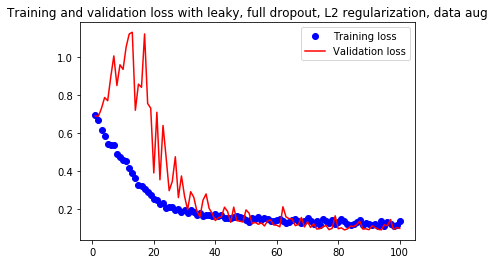

In [128]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()

In [38]:
#write the code to compute test set accuracy
#process the jpeg image
#create an image generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'C:\Users\HP\Desktop\Internship\Post-hurricane/test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 9000 images belonging to 2 classes.


In [39]:
test_results = model.evaluate_generator(test_generator)
test_results

[0.0740449866454906, 0.9708888835377163]

In [7]:
model = load_model('model_2_100epochs.h5')

In [8]:
from sklearn.metrics import roc_curve
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(450):
    x,y = test_generator.next()
    temp_y = model.predict(x)
    y.tolist()
    temp_y.tolist()
    y_pred.extend(temp_y)
    #print(temp_y)
    #print(y)
    #print('')
    y_label.extend(y)

Found 9000 images belonging to 2 classes.


In [9]:
len(y_pred)

9000

In [10]:
len(y_label)

9000

In [11]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_label, y_pred,pos_label=1)

In [12]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [13]:
print(auc_keras)

0.9963734999999999


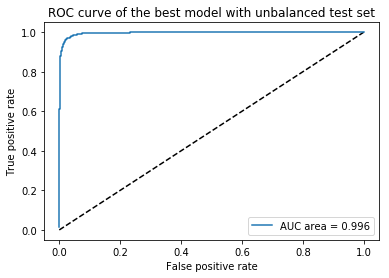

In [14]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC area = {:.3f}'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the best model with unbalanced test set')
plt.legend(loc='best')
plt.show()

Found 2000 images belonging to 2 classes.


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


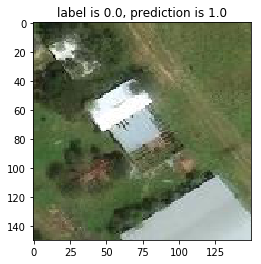

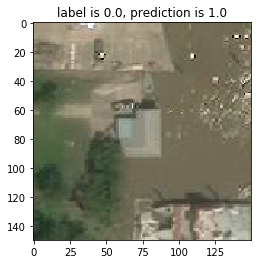

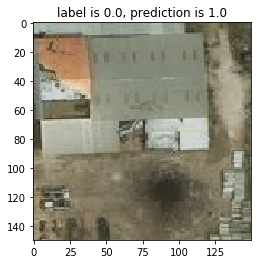

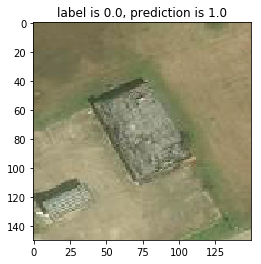

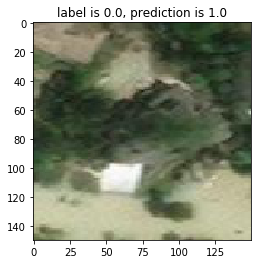

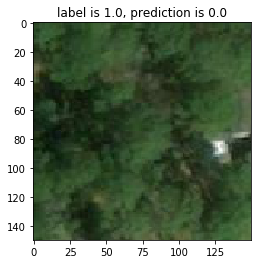

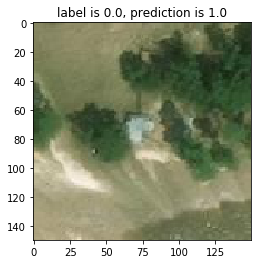

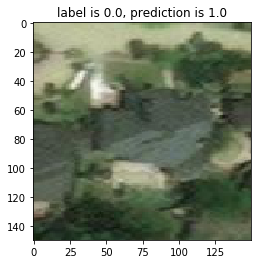

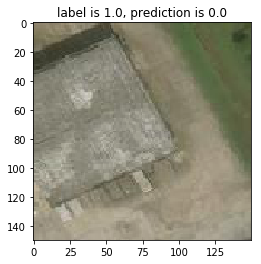

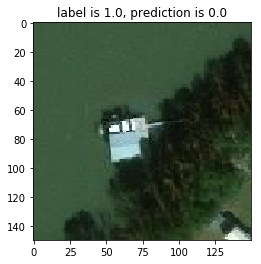

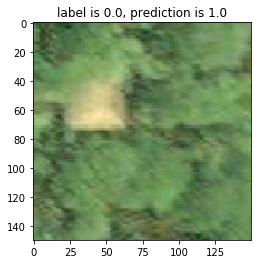

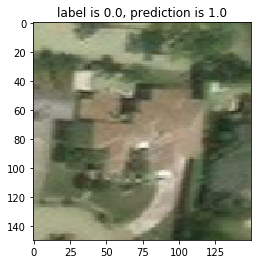

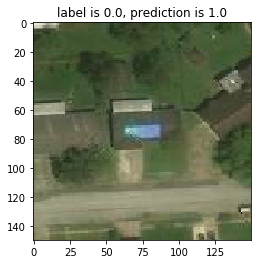

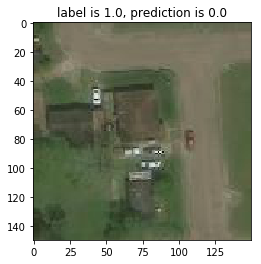

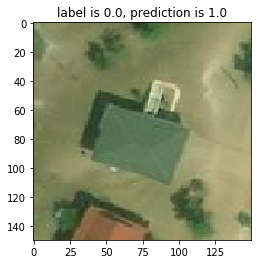

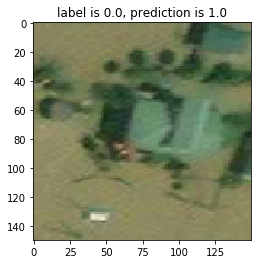

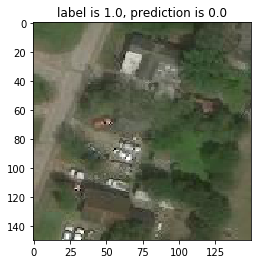

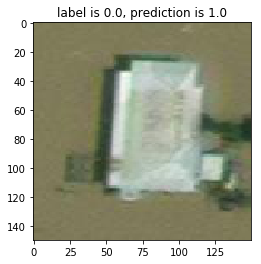

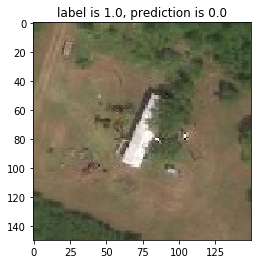

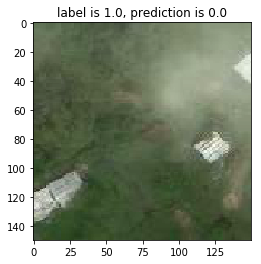

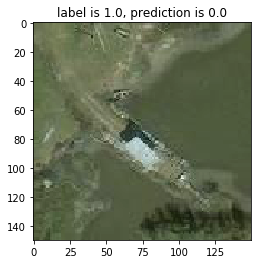

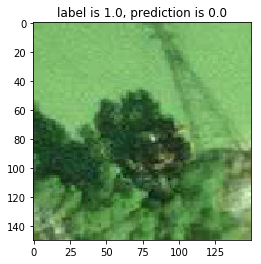

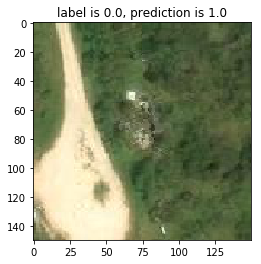

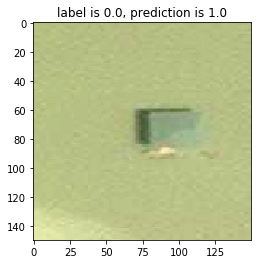

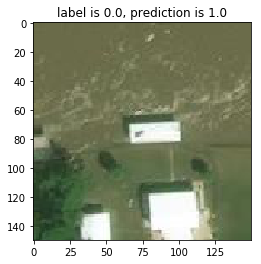

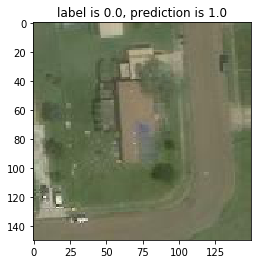

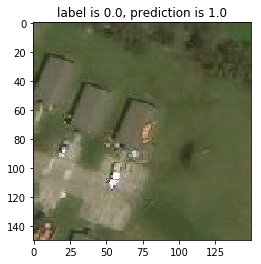

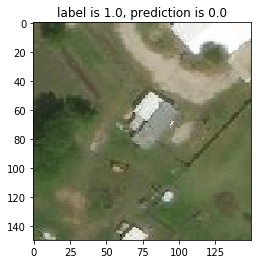

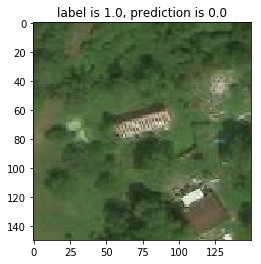

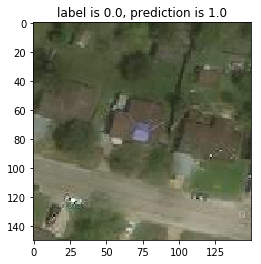

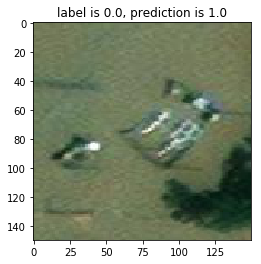

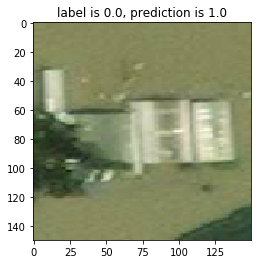

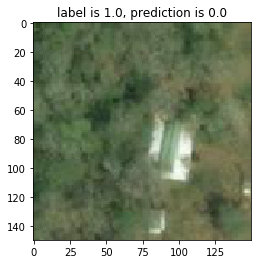

In [20]:
#see which image is misclassified
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/test', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(50):
    x,y = test_generator.next()
    y = y.ravel()
    temp_y = model.predict(x)
    temp_y = np.round(temp_y.ravel())
    misclassification = np.absolute(y-temp_y)

    #show the misclassification
    misclass_index = np.where(misclassification > 0.5)
    for j in range(len(misclass_index[0])):
        plt.figure()
        #print(misclass_index[0][j])
        plt.title('label is {}, prediction is {}'.format(y[misclass_index[0][j]],temp_y[misclass_index[0][j]]))
        plt.imshow(image.array_to_img(x[misclass_index[0][j]]))
    misclass_index = None

In [16]:
#to see how the generator encodes the images into binary or multiclass:
test_generator.class_indices

{'damage': 0, 'no_damage': 1}

In [17]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [28]:
#another grand model with just relu
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
# model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu',W_regularizer = l2(1e-4)))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    'C:/Users/HP/Desktop/Internship/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)



/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_regularizer=<keras.reg...)`


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 212ms/step - loss: 0.7720 - acc: 0.5238 - val_loss: 0.7517 - val_acc: 0.4944
Epoch 2/100
100/100 [==============================] - 19s 186ms/step - loss: 0.7377 - acc: 0.5450 - val_loss: 0.7209 - val_acc: 0.5275
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.5863 - acc: 0.7303 - val_loss: 0.4110 - val_acc: 0.8712
Epoch 4/100
100/100 [==============================] - 18s 183ms/step - loss: 0.4510 - acc: 0.8244 - val_loss: 0.3491 - val_acc: 0.8838
Epoch 5/100
100/100 [==============================] - 19s 186ms/step - loss: 0.3628 - acc: 0.8625 - val_loss: 0.2948 - val_acc: 0.8962
Epoch 6/100
100/100 [==============================] - 19s 186ms/step - loss: 0.3872 - acc: 0.8384 - val_loss: 0.2734 - val_acc: 0.9050
Epoch 7/100
100/100 [==============================] - 19s 186ms/step - loss: 0.3205 - acc: 0.8741 

In [33]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('model_everything_relu_Adam.h5')

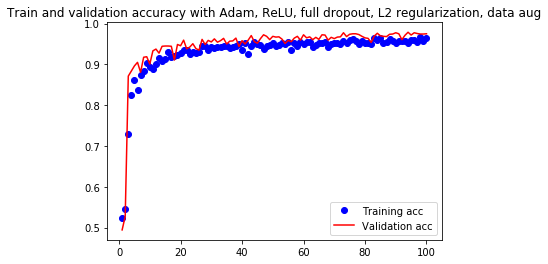

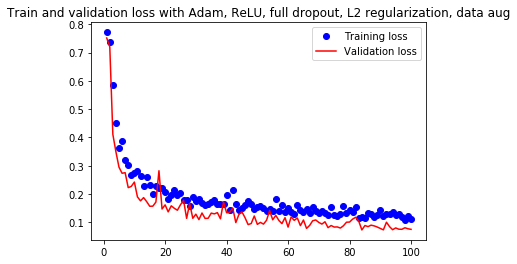

In [29]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Train and validation accuracy with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Train and validation loss with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()